In [2]:

# import modules
import pygmt
import numpy as np
import rioxarray
import geopandas as gpd
import seaborn as sns
import os


(8, 3)


grdcut [WARNING]: (w - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: w reset from 110.405626 to 110.405555556
grdcut [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: e reset from 110.489216816 to 110.489444444
grdcut [WARNING]: (s - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: s reset from -7.589190447 to -7.58944444444
grdcut [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: n reset from -7.497164647 to -7.49694444444


[110.405626, 110.489216816, -7.589190446999999, -7.497164647, 0, 4000]
[110.425, 110.45, -7.55, -7.53, 0, 4000]


/Applications/anaconda3/envs/pygmt_test/lib/python3.11/site-packages/pygmt/src/grdimage.py:168: RuntimeWarning: Input image has dtype: float32 which is unsupported, and may result in an incorrect output. Please recast image to a uint8 dtype and/or scale to 0-255 range, e.g. using a histogram equalization function like skimage.exposure.equalize_hist.
  with lib.virtualfile_from_data(


[[110.44311424  -7.53750184]
 [110.44295135  -7.53739078]
 [110.44275884  -7.53734635]
 [110.44264777  -7.53731674]
 [110.44245527  -7.53726491]
 [110.44229237  -7.53720567]
 [110.44214429  -7.53715385]
 [110.44202582  -7.53699836]
 [110.44192217  -7.5368947 ]
 [110.44184072  -7.53685768]
 [110.44168698  -7.53679845]
 [110.44156619  -7.53675818]
 [110.44145211  -7.53671792]
 [110.44135817  -7.53663739]
 [110.44126422  -7.53655687]
 [110.44115685  -7.53648976]
 [110.44106962  -7.53642937]
 [110.44094883  -7.53634885]
 [110.44080791  -7.53626832]
 [110.44064015  -7.53621464]
 [110.44048581  -7.53614753]
 [110.44033818  -7.53608714]
 [110.44014358  -7.53600661]
 [110.43992884  -7.53592609]
 [110.439782    -7.53584815]
 [110.43966292  -7.53585588]
 [110.43951332  -7.53593394]
 [110.4394873   -7.53595995]
 [110.43940925  -7.53600548]
 [110.43939624  -7.53607703]
 [110.43940925  -7.5361811 ]
 [110.4393853   -7.53630187]
 [110.43952622  -7.53640253]
 [110.43958661  -7.53646963]
 [110.43970069

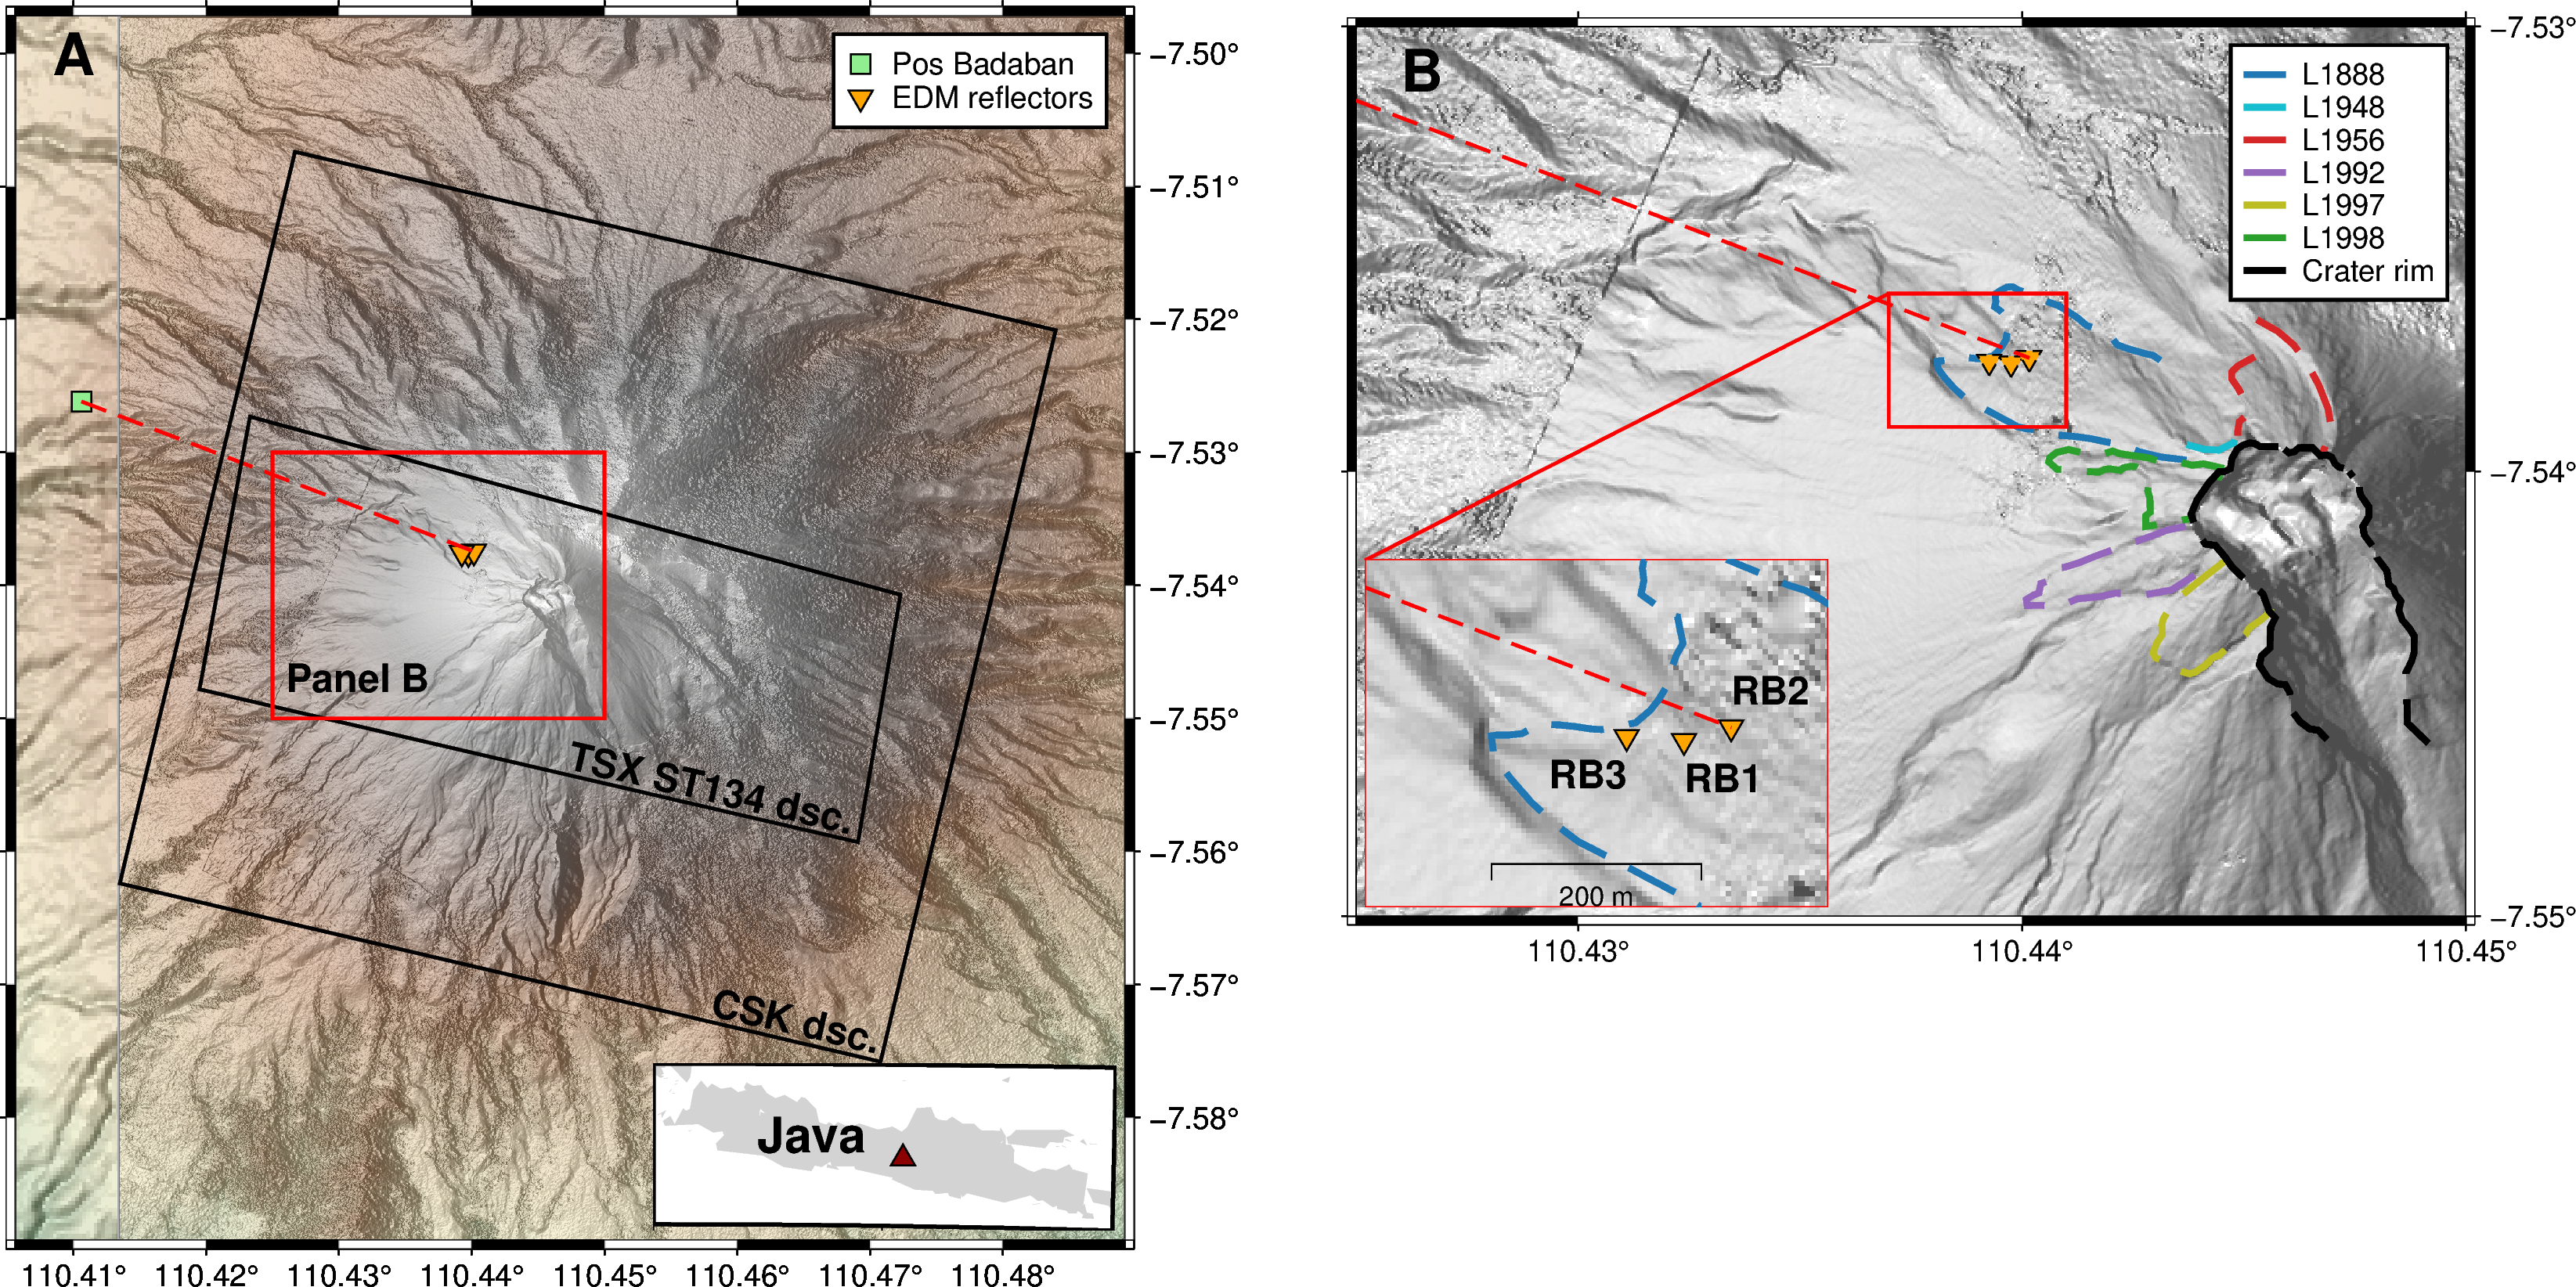

In [32]:

# define colours
# tab10: blue, orange, green, red, purple, brown, pink, grey, olive, cyan
colors_pre = sns.color_palette(sns.color_palette("tab10"))  # for the window sizes
colors = [colors_pre[0],
          colors_pre[9],
          colors_pre[3],
          colors_pre[3],
          colors_pre[4],
          colors_pre[8],
          colors_pre[2],
          [0,0,0]]
print(np.shape(colors))


# a.plot(coords_L1888[:,0],coords_L1888[:,1],linewidth=2,color='tab:blue',label='L1888')
# a.plot(coords_L1948[:,0],coords_L1948[:,1],linewidth=2,color='tab:cyan',label='L1948')
# a.plot(coords_L1956_1[:,0],coords_L1956_1[:,1],linewidth=2,color='tab:red',label='L1956')
# a.plot(coords_L1956_2[:,0],coords_L1956_2[:,1],linewidth=2,color='tab:red')
# a.plot(coords_L1992[:,0],coords_L1992[:,1],linewidth=2,color='tab:purple',label='L1992')
# a.plot(coords_L1997[:,0],coords_L1997[:,1],linewidth=2,color='tab:olive',label='L1997')
# a.plot(coords_L1998[:,0],coords_L1998[:,1],linewidth=2,color='tab:green',label='L1998')
# a.plot(coords_CRATER[:,0],coords_CRATER[:,1],linewidth=2,color='black',linestyle='--',label='Crater rim')

### load topo data
grid_merapi = (
    "/Users/tz20896/Documents/PhD/projects/Merapi2021/geo/TDX_Merapi_WGS84_5m.tif"
)

with rioxarray.open_rasterio(filename=grid_merapi) as img:
    image = img.load()  # Force loading the DataArray into memory

# calculate hillshade
dgrid = pygmt.grdgradient(grid=image[0], radiance=[270, 30])

### get EDM positions
pos_bad = np.array([110.410626, -7.526175])
reflectors = np.array(
    [[110.439757, -7.537567], [110.440165, -7.537451], [110.439260, -7.537533]]
)

### lava flows and crater
L1888_FILE = (
    "/Users/tz20896/Documents/PhD/projects/Merapi2021/merapi_maps/L1888_v2.shp"
)
L1948_FILE = (
    "/Users/tz20896/Documents/PhD/projects/Merapi2021/merapi_maps/L1948.shp"
)
L1956_FILE = (
    "/Users/tz20896/Documents/PhD/projects/Merapi2021/merapi_maps/L1956.shp"
)
L1992_FILE = (
    "/Users/tz20896/Documents/PhD/projects/Merapi2021/merapi_maps/L1992.shp"
)
L1997_FILE = (
    "/Users/tz20896/Documents/PhD/projects/Merapi2021/merapi_maps/L1997.shp"
)
L1998_FILE = (
    "/Users/tz20896/Documents/PhD/projects/Merapi2021/merapi_maps/L1998.shp"
)
L1986_FILE = (
    "/Users/tz20896/Documents/PhD/projects/Merapi2021/merapi_maps/L1986.shp"
)
L1984_FILE = (
    "/Users/tz20896/Documents/PhD/projects/Merapi2021/merapi_maps/L1984.shp"
)
L1931_FILE = (
    "/Users/tz20896/Documents/PhD/projects/Merapi2021/merapi_maps/L1931.shp"
)
CRATER_FILE = "/Users/tz20896/Documents/PhD/projects/Merapi2021/merapi_maps/Merapi_crater.shp"
# Read the shapefile
L1888 = gpd.read_file(L1888_FILE)
L1948 = gpd.read_file(L1948_FILE)
L1956 = gpd.read_file(L1956_FILE)
L1992 = gpd.read_file(L1992_FILE)
L1997 = gpd.read_file(L1997_FILE)
L1998 = gpd.read_file(L1998_FILE)
L1986 = gpd.read_file(L1986_FILE)
L1984 = gpd.read_file(L1984_FILE)
L1931 = gpd.read_file(L1931_FILE)
CRATER = gpd.read_file(CRATER_FILE)

# Extract latitude and longitude into separate columns
coords_L1888 = np.array(list(L1888["geometry"][0].coords))
coords_L1956_1 = np.array(list(L1956["geometry"][0].coords))
coords_L1956_2 = np.array(list(L1956["geometry"][1].coords))
coords_L1948 = np.array(list(L1948["geometry"][0].coords))
coords_L1992 = np.array(list(L1992["geometry"][0].coords))
coords_L1997 = np.array(list(L1997["geometry"][0].coords))
coords_L1998 = np.array(list(L1998["geometry"][0].coords))
coords_L1986 = np.array(list(L1986["geometry"][0].coords))
coords_L1984 = np.array(list(L1984["geometry"][0].coords))
coords_L1931 = np.array(list(L1931["geometry"][0].coords))
coords_CRATER = np.array(list(CRATER["geometry"][0].coords))

x_arr = np.array(image.x)
y_arr = np.array(image.y)

# set region
REGION = [
    pos_bad[0] - 0.005,
    np.max(x_arr),
    np.min(y_arr),
    np.max(y_arr),
    0,
    4000,
]

# get topo data for edge(where the high res can't reach)
coarse_grid = pygmt.datasets.load_earth_relief(resolution="01s", region=REGION)
coarse_dgrid = pygmt.grdgradient(grid=coarse_grid, radiance=[270, 30])

# define map region of interest
lon_lims = [110.425, 110.45]
lat_lims = [-7.55, -7.53]
REGION2 = [
    lon_lims[0],
    lon_lims[1],
    lat_lims[0],
    lat_lims[1],
    0,
    4000,
]
print(REGION)
print(REGION2)
MEAN_LON = int(np.round((REGION[0] + REGION[1]) / 2))
MEAN_LAT = int(np.round((REGION[2] + REGION[3]) / 2))
PROJECTION = "M15c"
PERSPECTIVE = [180, 90]
ZSIZE = "0.5c"
SHADING = True
PROJECTION_INSET = f"M5c"
AREA_THRESH = 10_000

# frame=["lSEt+tHillshade Map", "xa0.1", "ya0.1"],
pygmt.config(FORMAT_GEO_MAP="ddd.xx")
fig = pygmt.Figure()
# define figure configuration

# pygmt.makecpt(cmap="gray", series=[-1.5, 0.3, 0.01])
pygmt.makecpt(cmap="geo", series=[800, 3000])
# add SRTM topo
fig.grdimage(
    grid=coarse_grid,
    region=REGION,
    projection="M12c",
    frame=["lSEt", "xa0.01", "ya0.01"],
    cmap=True,
)

pygmt.makecpt(cmap="gray", series=[-1.5, 0.3, 0.01])
# add hillshade
fig.grdimage(
    grid=coarse_dgrid,
    region=REGION,
    projection="M12c",
    transparency=30,
    cmap=True,
)

# pygmt.makecpt(cmap="gray", series=[-1.5, 0.3, 0.01])
pygmt.makecpt(cmap="geo", series=[800, 3000])
# add SRTM topo
fig.grdimage(
    grid=image,
    region=REGION,
    projection="M12c",
    frame=["lSEt", "xa0.01", "ya0.01"],
    cmap=True,
)


pygmt.makecpt(cmap="gray", series=[-1.5, 0.3, 0.01])
# add SRTM hillshade
fig.grdimage(
    grid=dgrid,
    region=REGION,
    projection="M12c",
    frame=["lSEt", "xa0.01", "ya0.01"],
    transparency=30,
    cmap=True,
)


# pygmt.makecpt(cmap="gray", series=[-1.5, 0.3, 0.01])

# pos Badaban
fig.plot(
    x=pos_bad[0],
    y=pos_bad[1],
    style="s0.3c",
    pen="0.5p,black",
    fill="lightgreen",
    label = 'Pos Badaban'
)

# EDM reflectors
fig.plot(
    x=reflectors[:, 0],
    y=reflectors[:, 1],
    style="i0.3c",
    pen="0.5p,black",
    fill="orange",
    label = 'EDM reflectors'
)

# EDM line
fig.plot(
    x=[pos_bad[0], reflectors[1, 0]],
    y=[pos_bad[1], reflectors[1, 1]],
    pen="1p,red,-",
)

# CSK boundary
fig.plot(
    x=[110.4708, 110.4840, 110.4267,110.4135,110.4708],
    y=[-7.5758, -7.5208, -7.5074, -7.5624,-7.5758],
    pen="1p,black",
)

# TSX boundary
fig.plot(
    x=[110.4195, 110.4691, 110.4723, 110.4233, 110.4195],
    y=[-7.5478, -7.5593, -7.5407, -7.5273, -7.5478],
    pen="1p,black",
)

# zoom box
fig.plot(
    x=[lon_lims[0], lon_lims[1], lon_lims[1],lon_lims[0],lon_lims[0]],
    y=[lat_lims[0], lat_lims[0], lat_lims[1],lat_lims[1],lat_lims[0]],
    pen="1p,red",
)

# texts
# Create space-delimited file
with open("texts.txt", "w") as f:
    f.write("110.41 -7.5 0 18p,Helvetica-Bold,black CM A\n")
    f.write("110.426 -7.548 0 12p,Helvetica-Bold,black BL Panel B\n")
    f.write("110.4705 -7.5752 -13 12p,Helvetica-Bold,black BR CSK dsc.\n")
    f.write("110.4685 -7.5587 -13 12p,Helvetica-Bold,black BR TSX ST134 dsc.\n")


# Plot region names / sea names from a text file, where
# the longitude (x) and latitude (y) coordinates are in the first two columns.
# Setting angle/font/justiry to True will indicate that those columns are
# present in the text file too (Note: must be in that order!).
# Finally, the text to be printed will be in the last column
fig.text(textfiles="texts.txt", angle=True, font=True, justify=True)

# Cleanups
os.remove("texts.txt")

fig.legend()


# inset figure of Java
region = [105, 115, -9, -5.5]
with fig.inset(
    position="jBR+o0.1c",
    region=[105, 115, -9, -5.5],
    projection="U48L/5c",
):
    # Highlight the Japan area in "lightbrown"
    # and draw its outline with a pen of "0.2p".
    fig.coast(
        # Set the projection to Mercator, and plot size to 10 cm
        # Set the region of the plot
        region=[105, 115, -9, -5.5],
        # Set the frame of the plot
        frame="a",
        # Set the color of the land to "darkgreen"
        land="lightgrey",
        # Set the color of the water to "lightblue"
        water="white",
        resolution="l",
        # Draw national borders with a 1-point black line
        borders="1/1p,black",
    )
    # Plot a rectangle ("r") in the inset map to show the area of the main
    # figure. "+s" means that the first two columns are the longitude and
    # latitude of the bottom left corner of the rectangle, and the last two
    # columns the longitude and latitude of the uppper right corner.
    rectangle = [[REGION[0], REGION[2], REGION[1], REGION[3]]]
    Merapi_pos = [110.44, -7.53]
    font = "15p,Helvetica-Bold"
    fig.plot(
        x=Merapi_pos[0],
        y=Merapi_pos[1],
        style="t0.3c",
        pen="0.5p,black",
        fill="darkred",
    )
    fig.text(x=Merapi_pos[0] - 2, y=Merapi_pos[1] + 0.5, text="Java", font=font)


# Shift plot origin of the second map by 12.5 cm in x direction
fig.shift_origin(xshift="14.5c", yshift="3.5c")

fig.grdimage(
    grid=dgrid,
    region=REGION2,
    projection="M12c",
    frame=["lSEt", "xa0.01", "ya0.01"],
    cmap=True,
)

for lava, color, lab in zip([coords_L1888,coords_L1948,coords_L1956_1,coords_L1956_2,coords_L1992,coords_L1997,coords_L1998,coords_CRATER,],colors, ['L1888','L1948','L1956',[],'L1992','L1997','L1998','Crater rim']):
    print(lava)
    print(color)
    if lab == []:
        fig.plot(
            x=list(lava[:, 0]),
            y=list(lava[:, 1]),
            pen=f"2p,{color[0]*255}/{color[1]*255}/{color[2]*255},-",
        )
    else:
        fig.plot(
            x=list(lava[:, 0]),
            y=list(lava[:, 1]),
            pen=f"2p,{color[0]*255}/{color[1]*255}/{color[2]*255},-",
            label = lab,
        )

fig.plot(
        x=list(coords_CRATER[:,0]),
        y=list(coords_CRATER[:,1]),
        pen=f"2p,black,-.",
    )
fig.plot(
    x=reflectors[:, 0],
    y=reflectors[:, 1],
    style="i0.3c",
    pen="0.5p,black,-",
    fill="orange",
)


fig.plot(
    x=[pos_bad[0], reflectors[1, 0]],
    y=[pos_bad[1], reflectors[1, 1]],
    pen="1p,red,-",
)

fig.plot(
    x=[110.437, lon_lims[0]+0.0002],
    y=[-7.536, -7.542],
    pen="1p,red",
)

# texts
# Create space-delimited file
with open("texts.txt", "w") as f:
    f.write("110.426 -7.5305 0 18p,Helvetica-Bold,black TL B\n")

fig.text(textfiles="texts.txt", angle=True, font=True, justify=True)
# Cleanups
os.remove("texts.txt")

# zoom box
fig.plot(
    x=[110.437, 110.441, 110.441, 110.437, 110.437],
    y=[-7.539, -7.539, -7.536, -7.536, -7.539],
    pen="1p,red",
)

fig.legend()
pygmt.config(MAP_FRAME_PEN='5p,red')
# inset figure of Java
region = [110.437, 110.441, -7.539, -7.536]
with fig.inset(
    position="jBL+o0.1c",
    region=region,
    projection="M5c",
):
    

    fig.grdimage(
    grid=dgrid,
    frame=["lset", "xa0.01", "ya0.01"],
    cmap=True,
    )
    fig.coast(water ='skyblue',map_scale = 'n0.5/0.1+w200e')

    # EDM reflectors
    fig.plot(
        x=reflectors[:, 0],
        y=reflectors[:, 1],
        style="i0.3c",
        pen="0.5p,black",
        fill="orange",
    )

    # EDM line
    fig.plot(
        x=[pos_bad[0], reflectors[1, 0]],
        y=[pos_bad[1], reflectors[1, 1]],
        pen="1p,red,-",
    )

    fig.plot(
        x=list(coords_L1888[:,0]),
        y=list(coords_L1888[:,1]),
        pen=f"2p,{colors[0][0]*255}/{colors[0][1]*255}/{colors[0][2]*255},-",
    )


    # texts
    # Create space-delimited file
    with open("texts.txt", "w") as f:
        f.write(f"{reflectors[0,0]} {reflectors[0,1]-0.0002} 0 12p,Helvetica-Bold,black TL RB1\n")
        f.write(f"{reflectors[1,0]} {reflectors[1,1]+0.0002} 0 12p,Helvetica-Bold,black BL RB2\n")
        f.write(f"{reflectors[2,0]} {reflectors[2,1]-0.0002} 0 12p,Helvetica-Bold,black TR RB3\n")

    fig.text(textfiles="texts.txt", angle=True, font=True, justify=True)
    # Cleanups
    os.remove("texts.txt")

print('got to the end')
fig.savefig("/Users/tz20896/Documents/PhD/projects/Merapi_volc/Merapi_figures/Merapi_overview_EDM.png")
fig.savefig("/Users/tz20896/Documents/PhD/projects/Merapi_volc/Merapi_figures/Merapi_overview_EDM.pdf")
fig.show()
